In [1]:
import tensorflow as tf
import keras as keras
import numpy as np

In [2]:
print("tensorflow.ver", tf.__version__)
print("keras", keras.__version__)

tensorflow.ver 2.17.0
keras 3.5.0


## Linear Classification

#### Problem: Patients have malignant breast cancer or not

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
# Load dataset
df = load_breast_cancer()
type(df)

sklearn.utils._bunch.Bunch

In [6]:
# NOTE: It is a Bunch object (similar idea dictionary format
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
df.data.shape

(569, 30)

In [8]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
print(df.feature_names.shape)
df.feature_names

(30,)


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
# Let's split the data into a training and test datasets
from sklearn.model_selection import train_test_split

In [12]:
# Ready to use train_test_split function to split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size = 1/3)
N, D = X_train.shape
print(N, D)

379 30


In [13]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Build the model using Tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), # input layer with 30 features
    tf.keras.layers.Dense(1, activation = 'sigmoid') # output layer with 1 node for classification)
])

In [16]:
model.compile(optimizer = 'adam', #Adam: Adaptive Moment Estimation
              loss = 'binary_crossentropy', # minimize miss classification
              metrics = ['accuracy'])

In [17]:
# Ready to train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5654 - loss: 0.7518 - val_accuracy: 0.5158 - val_loss: 0.8203
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6132 - loss: 0.6979 - val_accuracy: 0.5947 - val_loss: 0.7486
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7144 - loss: 0.5870 - val_accuracy: 0.6368 - val_loss: 0.6853
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7367 - loss: 0.5470 - val_accuracy: 0.6895 - val_loss: 0.6291
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7853 - loss: 0.5149 - val_accuracy: 0.7211 - val_loss: 0.5813
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8115 - loss: 0.4513 - val_accuracy: 0.7526 - val_loss: 0.5382
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8185 - loss: 0.4261 - val_accuracy: 0.7737 - val_loss: 0.5006
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8468 - loss: 0.3937 - val_accuracy: 0.8000 - 

In [18]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0924 
Train score: [0.08405496180057526, 0.9762532711029053]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - loss: 0.1219 
Test score: [0.12524957954883575, 0.9526315927505493]


In [19]:
# plot of loss history
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

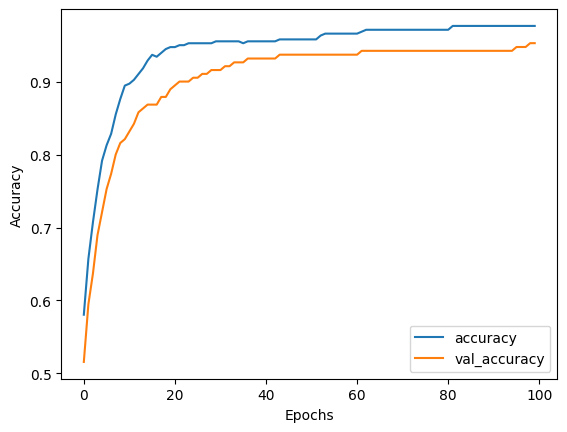

In [34]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')

# adding x and y labels
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# adding Legend
plt.legend()

plt.show

In [24]:
P = model.predict(X_test)
print(P)
print(P.shape)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[4.81041534e-05]
 [1.98968896e-03]
 [9.99041617e-01]
 [9.80974495e-01]
 [9.88355935e-01]
 [9.98632312e-01]
 [2.19405532e-01]
 [6.31564021e-01]
 [9.83181059e-01]
 [5.47231674e-01]
 [9.65026617e-01]
 [9.97628748e-01]
 [9.81339455e-01]
 [9.90777016e-01]
 [9.80270445e-01]
 [1.39425471e-01]
 [7.72845507e-01]
 [1.68923456e-02]
 [5.02254032e-02]
 [9.99337912e-01]
 [8.57497156e-01]
 [1.16512664e-01]
 [8.80466998e-01]
 [7.91665614e-01]
 [9.94346142e-01]
 [1.11643712e-04]
 [4.28582221e-01]
 [2.49247969e-04]
 [5.52617490e-01]
 [2.66663410e-04]
 [9.73844826e-01]
 [9.90318120e-01]
 [8.85262132e-01]
 [9.62965250e-01]
 [1.24612893e-06]
 [9.74791467e-01]
 [9.81422663e-01]
 [9.64435697e-01]
 [9.63227272e-01]
 [9.37064409e-01]
 [3.66116525e-04]
 [8.87084246e-01]
 [8.80531490e-01]
 [9.86780882e-01]
 [9.98992682e-01]
 [9.98668194e-01]
 [9.99693990e-01]
 [9.47370350e-01]
 [9.88389492e-01]
 [9.96524632e-01]
 [1.93441194e-02]
 [9.95779634e-01]
 [9.97007132e-01]
 [9.5836

In [25]:
P = np.round(P).flatten()
print(P)
print(P.shape)

[0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
(190,)


In [27]:
print("Manually calculated accuracy (validation = test data)", np.mean(P == y_test))
print("From actual model", model.evaluate(X_test, y_test))

Manually calculated accuracy (validation = test data) 0.9526315789473684
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9429 - loss: 0.1219 
From actual model [0.12524957954883575, 0.9526315927505493]


### Saving and Loading a model

In [31]:
model.save("logistic.classifier.h5")

# check
!dir

 驱动器 C 中的卷是 OS
 卷的序列号是 420F-C9C4

 C:\Users\valha\Stat 479 的目录

2024/09/20  10:30    <DIR>          .
2024/09/18  19:08    <DIR>          ..
2024/09/20  09:13    <DIR>          .ipynb_checkpoints
2024/09/06  11:49             8,572 Example.ipynb
2024/09/20  10:30            76,376 Lab2.ipynb
2024/09/20  10:31            17,960 logistic.classifier.h5
               3 个文件        102,908 字节
               3 个目录 251,668,602,880 可用字节


In [32]:
# Let's laod the model and confirm that it still works.
model = tf.keras.models.load_model(r'C:\Users\valha\Stat 479\logistic.classifier.h5')

In [33]:
print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9429 - loss: 0.1219  


[0.12524957954883575, 0.9526315927505493]

## Linear Regression

In [38]:
import pandas as pd
import urllib.request

In [39]:
url = 'http://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'

In [40]:
urllib.request.urlretrieve(url, 'moore.csv')
print('download i complete')

download i complete


In [41]:
data = pd.read_csv('moore.csv', header=None).values
print(data.shape)

(162, 2)


In [44]:
# reshape the data with 2D array of size N by 1
X = data[:,0].reshape(-1,1)
print(X.shape)
Y = data[:,1]
print(Y.shape)

(162, 1)
(162,)


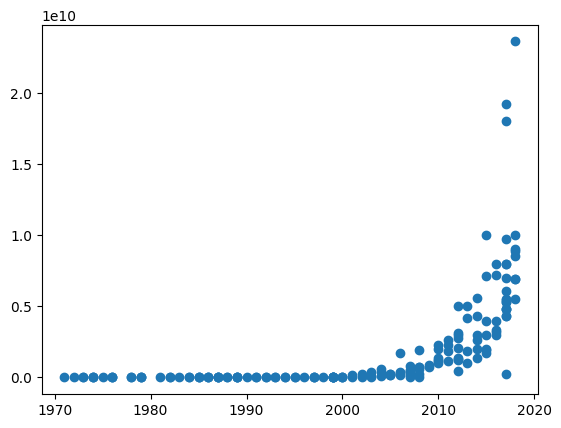

In [45]:
plt.scatter(X, Y)

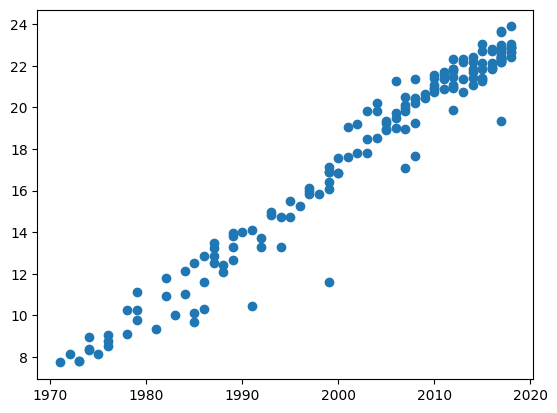

In [46]:
# Needs Log Transformation on Y for Linear Regression
Y = np.log(Y)
plt.scatter(X, Y)

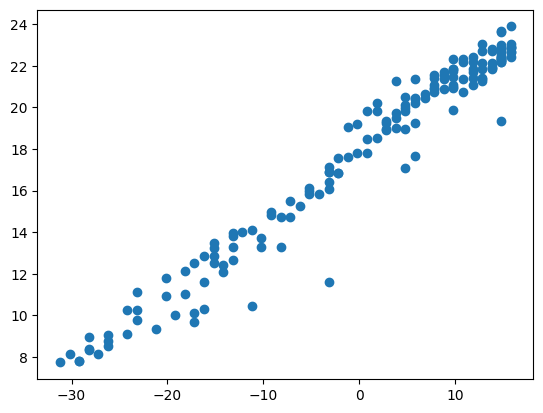

In [64]:
# Let's Center X
X = X - X.mean()
plt.scatter(X,Y)

In [65]:
# Build our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)), # only 1 feature
    tf.keras.layers.Dense(1) # 1 regression output
])

In [66]:
model.compile(optimizer = tf.keras.optimizers.SGD(.001, .9), # (learning rate, momentum)
              loss = 'mse')

In [67]:
# Let's change the learning rate
def schedule(epoch, lr):
    if epoch >= 50:
        return .0001
    return .001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs = 200, callbacks = [scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 327.4141 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 294.9996 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 292.7995 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 264.2816 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 181.4191 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 186.3166 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 164.7091 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 126.9166 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 93.2972 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 60.8468 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.4874 - learning_rate: 0.0010

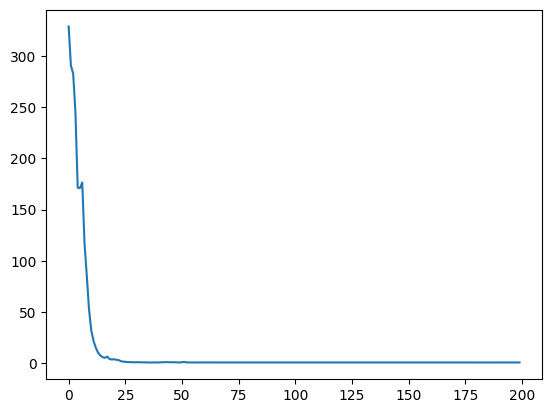

In [68]:
# plot the loss
plt.plot(r.history['loss'], label = "loss")

In [69]:
# Get the slope of the regression line
print(model.layers)
print(model.layers[0].get_weights())

[<Dense name=dense_3, built=True>]
[array([[0.339944]], dtype=float32), array([17.761265], dtype=float32)]


In [70]:
# Retrieve the slope
a = model.layers[0].get_weights()[0][0][0]
print(a)

0.339944


$$ C = A_0 r^t $$

$$ \log C = t \log r + \log A_0 $$

$$ \hat{y} = \log C$$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

$$ a = \log r = 0.339944 $$
$$ r = e^.339944 = 1.4 $$

## Making predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


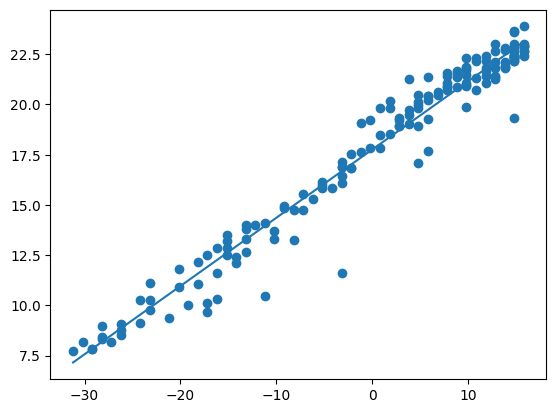

In [72]:
Y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [73]:
# Manual calculation
w, b = model.layers[0].get_weights()
print(w, b)

[[0.339944]] [17.761265]
